In [18]:
# pip install -U scikit-learn scipy matplotlib

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
import tensorflow as tf
from keras.layers import LSTM, Dense,Dropout
from keras.models import Sequential

from sklearn.model_selection import train_test_split
import sklearn.model_selection as sk

# fix random seed for reproducibility

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
data = pd.read_json('./data.json')

: 

# Data insight

In [21]:
data.head()

,input,output
0,"[[[0.383456051349639, 0.34302234649658203, -0....",1
1,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",1
2,"[[[0.37763154506683305, 0.32284885644912703, -...",1
3,"[[[0.365433990955352, 0.337661623954772, -0.64...",1
4,"[[[0.38001239299774103, 0.341646373271942, -0....",1


In [22]:
data_size = len(data)
data_train_sise = int(data_size * 80 / 100)
data_test_size = data_size - data_train_sise

In [23]:
def change_input(input):
    new_input = []
    featFrame = []

    last_frame = input[-1]
    while len(input) < 22:
        input.append(last_frame)
    for frame in input[:21]:
        featFrame = []
        for feat in frame:
            featFrame = featFrame + feat
        new_input.append(featFrame)

    return new_input

def change_output(output):
    new_output = [0] * 11
    new_output[int(output) - 1] = 1
    return new_output

In [24]:
data['new_input'] = [change_input(input) for input in data.input]
data['new_output'] = [change_output(output) for output in data.output]

In [25]:
data.describe(include='all')

,input,output,new_input,new_output
count,125,125.000000,125,125
unique,122,NaN,122,11
top,"[[[0.502221167087554, 0.211829900741577, -0.63...",NaN,"[[0.502221167087554, 0.211829900741577, -0.638...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]"
freq,2,NaN,2,16
mean,NaN,6.256000,NaN,NaN
std,NaN,3.174759,NaN,NaN
min,NaN,1.000000,NaN,NaN
25%,NaN,4.000000,NaN,NaN
50%,NaN,6.000000,NaN,NaN
75%,NaN,9.000000,NaN,NaN


In [34]:
X_train, X_test, y_train, y_test = sk.train_test_split(np.array(list(data.new_input[data.output < 11])), np.array(list(data.new_output[data.output < 11])),
                                                    test_size=0.1,
                                                    random_state=42)
print('Data size:', len(X_train), ", test size:", len(X_test) )


Data size: 102 , test size: 12


In [35]:
X_train.shape

(102, 21, 105)

In [36]:
model  = Sequential()
model.add(LSTM(units = 512, return_sequences = True, input_shape = (X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units = 256, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 64, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 32))
model.add(Dropout(0.2))
model.add(Dense(units = 11, activation="softmax"))
model.compile(optimizer="adam", metrics = ['accuracy'], loss = tf.keras.losses.MeanSquaredError())
model.summary()



Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_16 (LSTM)              (None, 21, 512)           1265664   
                                                                 
 dropout_16 (Dropout)        (None, 21, 512)           0         
                                                                 
 lstm_17 (LSTM)              (None, 21, 256)           787456    
                                                                 
 dropout_17 (Dropout)        (None, 21, 256)           0         
                                                                 
 lstm_18 (LSTM)              (None, 21, 64)            82176     
                                                                 
 dropout_18 (Dropout)        (None, 21, 64)            0         
                                                                 
 lstm_19 (LSTM)              (None, 32)               

In [37]:
hist = model.fit(X_train, y_train, epochs=300, batch_size=32,validation_data=(X_test, y_test))
model.save("model.h5")

Epoch 1/300
4/4 [==============================] - 16s 1s/step - loss: 0.0837 - accuracy: 0.0588 - val_loss: 0.0832 - val_accuracy: 0.0833
Epoch 2/300
4/4 [==============================] - 2s 535ms/step - loss: 0.0818 - accuracy: 0.1765 - val_loss: 0.0848 - val_accuracy: 0.0000e+00
Epoch 3/300
4/4 [==============================] - 2s 582ms/step - loss: 0.0816 - accuracy: 0.1765 - val_loss: 0.0836 - val_accuracy: 0.0000e+00
Epoch 4/300
4/4 [==============================] - 2s 630ms/step - loss: 0.0804 - accuracy: 0.2059 - val_loss: 0.0815 - val_accuracy: 0.1667
Epoch 5/300
4/4 [==============================] - 3s 715ms/step - loss: 0.0799 - accuracy: 0.1765 - val_loss: 0.0832 - val_accuracy: 0.0833
Epoch 6/300
4/4 [==============================] - 3s 630ms/step - loss: 0.0803 - accuracy: 0.1961 - val_loss: 0.0832 - val_accuracy: 0.0833
Epoch 7/300
4/4 [==============================] - 3s 644ms/step - loss: 0.0796 - accuracy: 0.1863 - val_loss: 0.0798 - val_accuracy: 0.0833
Epoch 8

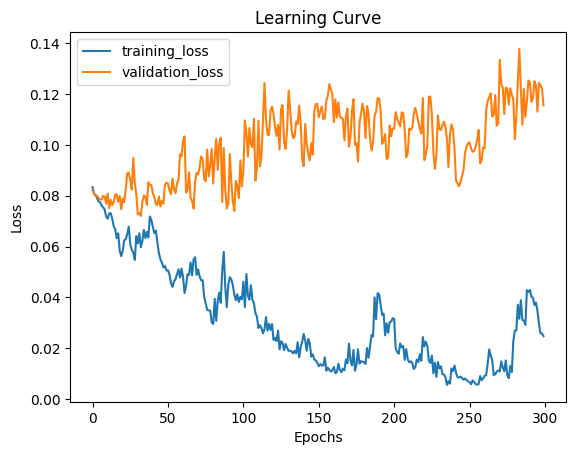

In [ ]:
training_loss = hist.history['loss']
val_loss = hist.history['val_loss']

plt.plot(training_loss, label="training_loss")
plt.plot(val_loss, label="validation_loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Learning Curve")
plt.legend(loc='best')
plt.show()

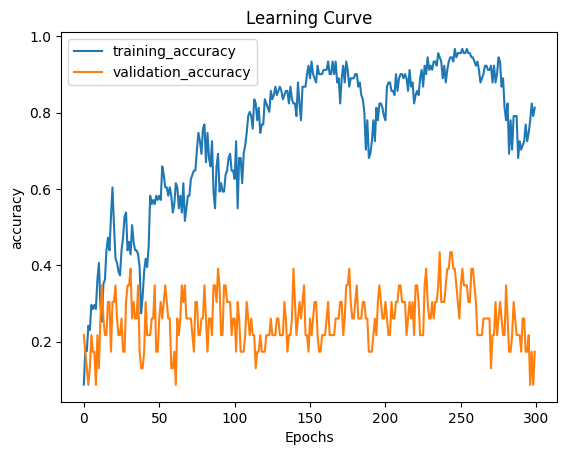

In [ ]:
training_acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']

plt.plot(training_acc, label="training_accuracy")
plt.plot(val_acc, label="validation_accuracy")
plt.xlabel("Epochs")
plt.ylabel("accuracy")
plt.title("Learning Curve")
plt.legend(loc='best')
plt.show()
